In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
import json
from pprint import pprint
from scipy.signal import find_peaks, peak_prominences

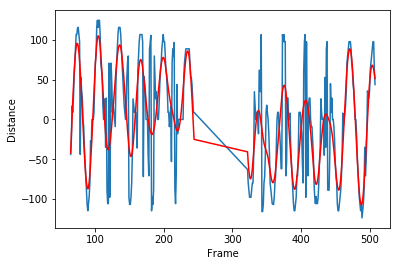

v_peaks [  2  11  29  39  50  56  62  71  84  91 102 107 117 122 135 146 151 170
 191 201 209 225 232 239 257 265 271 281 288 297 302 320 330 347 356 364]
low_peaks [ 10  40  71 102 135 171 197 234 266 295 330 363]


In [2]:
with open('dis_info/dis_info_04.txt') as f:
    data = json.load(f)

#pprint(data)
tdata = []
vdata = []
keylist = data.keys()
keylist = [int(x) for x in keylist]
keylist.sort()
for key in keylist:
    tdata.append(key)
    vdata.append(data[str(key)]["dis"])
''' 
print(keylist)
plt.plot(tdata, vdata)
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.show()
'''
b, a = signal.butter(3, 0.1, btype='lowpass', analog=False)
low_vdata = signal.filtfilt(b, a, vdata)

plt.plot(tdata, vdata)
plt.plot(tdata, low_vdata, 'r-')
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.show()

v_peaks, _ = find_peaks(vdata, distance=5)
low_peaks, _ = find_peaks(low_vdata, distance=5)

'''
plt.plot(tdata, vdata)
plt.plot(tdata, low_vdata, 'r-')
plt.plot(v_peaks, vdata[v_peaks], "x")
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.show()
'''

print ("v_peaks", v_peaks)
print ("low_peaks", low_peaks)

origin_peak [  2  11  15  29  39  41  50  52  56  59  62  71  84  91 102 107 117 119
 122 125 135 146 149 151 155 170 191 194 198 201 209 225 232 234 239 243
 257 265 267 271 281 288 294 297 302 304 320 330 347 352 356 364]


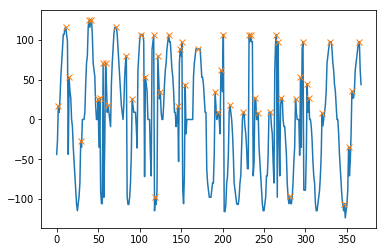

In [3]:
### method2: Calculate mean prominence then use it to compute peaks
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_prominences.html

# apply for origin data
origin_data = np.array(vdata)
origin_peaks, _ = find_peaks(origin_data)
origin_prominences = peak_prominences(origin_data, origin_peaks)[0]

origin_peak, _ = find_peaks(origin_data, prominence=1)
print ("origin_peak", origin_peak)

plt.plot(origin_data)
plt.plot(origin_peak, origin_data[origin_peak], "x")
plt.show()


lowpassed_peak [ 10  40  71 102 135 171 197 234 266 295 330 363]


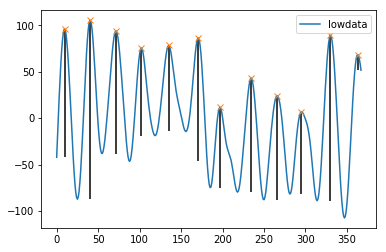

num_peak 12


In [38]:
# apply for lowpassed data
x = np.array(low_vdata)

peaks, _ = find_peaks(x)
prominences = peak_prominences(x, peaks)[0]

# peaks, _ = find_peaks(x, prominence=1)
peaks, _ = find_peaks(x, distance=26)
print ("lowpassed_peak", peaks)

contour_heights = x[peaks] - prominences

plt.plot(x)
plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])
plt.plot(peaks, x[peaks], "x")
plt.legend(['lowdata'])
plt.show()

print("num_peak", len(peaks))

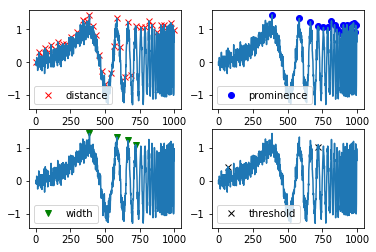

In [5]:
# https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, find_peaks_cwt

x = np.sin(2*np.pi*(2**np.linspace(2,10,1000))*np.arange(1000)/48000) + np.random.normal(0, 1, 1000) * 0.15
peaks, _ = find_peaks(x, distance=20)
peaks2, _ = find_peaks(x, prominence=1)      # BEST!
peaks3, _ = find_peaks(x, width=20)
peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])
plt.show()